# Phase diff of incoming tilted beam on local gaussian for Inf. half-plane PD

\begin{equation}
\arctan ( \frac{\sqrt{2 \pi} w(z) \alpha \; e^{-\frac{2 b^2}{w(z)^2}}}{ \lambda \; \text{erfc}(\frac{\sqrt{2} b}{w(z)})} )
\end{equation}



In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfc 
from math import exp
pi=np.pi

### input

In [2]:
#spot, wavelength, gap half-width
w= 1e-3
lam= 1064e-9

#alpha(10nrad)
alpha_min=-700e-6
alpha_max=700e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = cycle

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

### phase diff vs. angle

Full gap width is  0.01 mm


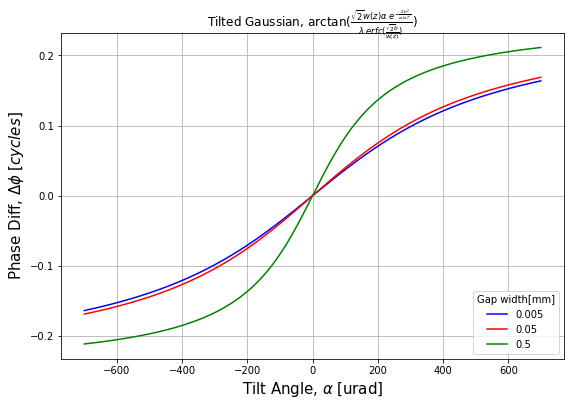

In [58]:
#gap width variables
b =5e-6
b1=5e-5
b2=5e-4

#function    
def phase_diff(b): 
     return(np.arctan( np.sqrt(2*pi)*(w*alpha* exp(-b**2/w**2))/ (lam*erfc(np.sqrt(2)*b/w) ) ))

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))
plt.plot(alpha*alpha_scale, phase_diff(b)*phase_scale, "-b", label=(str(b*1e3)) ) 
plt.plot(alpha*alpha_scale, phase_diff(b1)*phase_scale, "-r", label=(str(b1*1e3)) ) 
plt.plot(alpha*alpha_scale, phase_diff(b2)*phase_scale, "-g", label=(str(b2*1e3)) ) 

plt.legend(title="Gap width[mm]",loc="lower right")
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Tilted Gaussian, $\arctan ( \frac{\sqrt{2} w(z) \alpha \; e^{-\frac{2 b^2}{w(z)^2}}}{ \lambda \; {erfc}(\frac{\sqrt{2} b}{w(z)})} )$') 
plt.grid() 
plt.savefig("tilt-initial-gap.png")

print("Full gap width is ", b*2e3,"mm")

### Computed Deriv. (just checking the previous)
$\frac{d \Delta \phi}{d \alpha}$

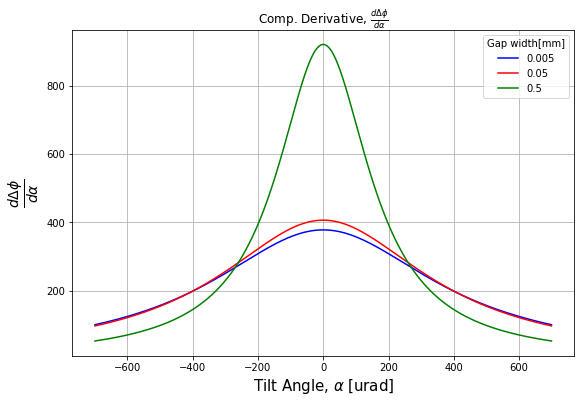

In [57]:
#function
deriv = np.diff(phase_diff(b)) / np.diff(alpha)
deriv1 = np.diff(phase_diff(b1)) / np.diff(alpha)
deriv2 = np.diff(phase_diff(b2)) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv*phase_scale, "-b", label=(str(b*1e3)) ) 
plt.plot(alpha2*alpha_scale, deriv1*phase_scale, "-r", label=(str(b1*1e3)) ) 
plt.plot(alpha2*alpha_scale, deriv2*phase_scale, "-g", label=(str(b2*1e3)) ) 
plt.legend(title="Gap width[mm]",loc="upper right")

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()

plt.savefig("tilt-initial-gap-der.png")